<a href="https://colab.research.google.com/github/Yeswanthprasad1/Deeplearning/blob/main/1_mnist_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras import models, layers, Sequential
from sklearn.model_selection import train_test_split
from keras.layers import Dense , Dropout , Conv2D , MaxPooling2D, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import pandas as pd
import numpy as np
from keras.datasets import mnist

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
# Flatten the image data
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Convert to pandas DataFrame
df_train = pd.DataFrame(X_train_flat)
df_train['label'] = y_train

df_test = pd.DataFrame(X_test_flat)
df_test['label'] = y_test


In [ ]:
# Display the first few rows of the training DataFrame
print(df_train.head())

# Display the first few rows of the test DataFrame
print(df_test.head())

   0  1  2  3  4  5  6  7  8  9  ...  775  776  777  778  779  780  781  782  \
0  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
1  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
2  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
3  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
4  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   

   783  label  
0    0      5  
1    0      0  
2    0      4  
3    0      1  
4    0      9  

[5 rows x 785 columns]
   0  1  2  3  4  5  6  7  8  9  ...  775  776  777  778  779  780  781  782  \
0  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
1  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
2  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
3  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   

In [ ]:
pixel_data=df_train.iloc[:,1:785] #from col 1 to 785
label=df_train["label"]

number=np.array(pixel_data)
number=number.reshape(len(pixel_data),28,28,1)

Text(0.5, 1.0, 'Value is: 5')

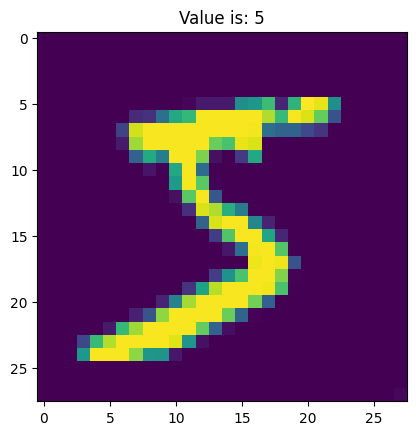

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(number[0])
plt.title("Value is: %d" % label[0])

In [ ]:
# Train test split

X_train, X_test, y_train, y_test= train_test_split(number, label, train_size=0.2, random_state=42)

In [ ]:
# Initialize an image data generator for data augmentation or preprocessing
img_data_gen = ImageDataGenerator()

# Create a sequential model
model = Sequential()

# Add the first convolutional layer with 8 filters, a 3x3 kernel, ReLU activation, and an input shape of 28x28x1 (grayscale images)
model.add(Conv2D(8, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))

# Add a second convolutional layer with 16 filters and a 3x3 kernel
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu'))

# Add a max pooling layer to downsample the feature maps by a factor of 2
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add a dropout layer to prevent overfitting by randomly setting 25% of the input units to 0
model.add(Dropout(0.25))

# Add a third convolutional layer with 32 filters and a 3x3 kernel
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))

# Add another max pooling layer to downsample the feature maps by a factor of 2
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add a fourth convolutional layer with 32 filters and a 3x3 kernel
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))

# Add another max pooling layer to downsample the feature maps by a factor of 2
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add another dropout layer to prevent overfitting by randomly setting 25% of the input units to 0
model.add(Dropout(0.25))

# Flatten the 3D feature maps to 1D feature vectors
model.add(Flatten())

# Add a dense (fully connected) layer with 64 units and ReLU activation
model.add(Dense(64, activation='relu'))

# Add a dropout layer to prevent overfitting by randomly setting 50% of the input units to 0
model.add(Dropout(0.5))

# Add a dense (fully connected) output layer with 10 units (one for each class) and softmax activation
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train,epochs=27)

Epoch 1/27
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.9168 - loss: 0.2514
Epoch 2/27
375/375 ━━━━━━━━━━━━━━━━━━━━ 19s 27ms/step - accuracy: 0.9185 - loss: 0.2389
Epoch 3/27
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.9163 - loss: 0.2449
Epoch 4/27
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.9209 - loss: 0.2361
Epoch 5/27
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.9186 - loss: 0.2351
Epoch 6/27
375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.9250 - loss: 0.2332
Epoch 7/27
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.9267 - loss: 0.2241
Epoch 8/27
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.9287 - loss: 0.2213
Epoch 9/27
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.9298 - loss: 0.2068
Epoch 10/27
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.9282 - loss: 0.2261
Epoch 11/27
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - accuracy: 0.9394 - loss: 0.1779
Epoch 12/27
375/375 ━━━━━━━━━━━━

In [ ]:
# Test using validation set
y_pred = model.predict(X_test)
y_predict = [np.argmax(y_pred[i]) for i in range(len(y_pred))]

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step


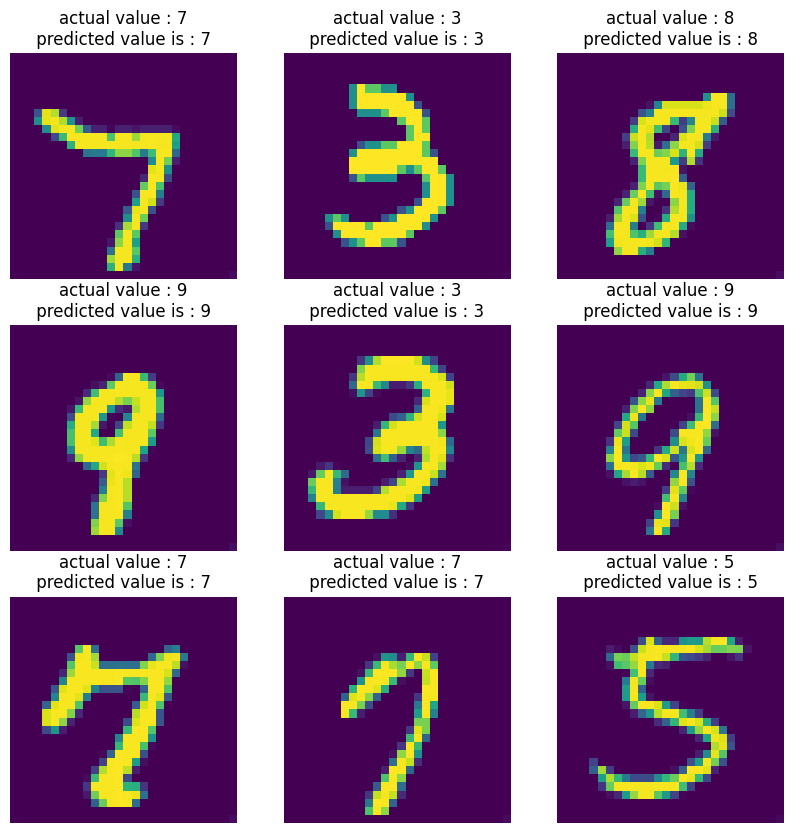

In [ ]:
# Verify the actual and predicted value
y_list = y_test.to_list()
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[i])
    plt.axis('off')
    plt.title('actual value : %d' %y_list[i]+ '\n predicted value is : %d ' % y_predict[i])

In [ ]:
# validation for the accuracy
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test,y_predict))

Accuracy: 0.9798541666666667
